In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization


from ase.build import bulk
from ase.io.trajectory import Trajectory
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from sklearn.model_selection import train_test_split 
from sklearn.kernel_ridge import KernelRidge 
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, SOAP
from ase import Atoms
from ase.io import read

import cWT

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
import dftpy
dftpy.__path__

['/opt/homebrew/lib/python3.11/site-packages/dftpy']

In [3]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [4]:
import os
os.chdir('../')
path_file = os.getcwd()

In [5]:
import h5py
file = h5py.File("/Users/valeria/Documents/aiWT/Final_version/wt/wt/organize_data/Data_phases.hdf5", "r")
fileX = file["Descriptor"]
rho0_KE_WT = file["rho0_KE_wt"]
rho0_TE_WT = file["rho0_TE_wt"]
rho0_DEN_WT = file["rho0_DEN_wt"]
rho0_KE_SM = file["rho0_KE_sm"]
rho0_TE_SM = file["rho0_TE_sm"]
rho0_DEN_SM = file["rho0_DEN_sm"]
Rho = file["rho"]


rho0_KE_wt =[]
rho0_TE_wt =[]
rho0_DEN_wt=[]
rho0_KE_sm =[]
rho0_TE_sm =[]
rho0_DEN_sm =[]
rho = []
for i in np.arange(0,280):
    rho0_KE_wt.append(rho0_KE_WT[i][0]) 
    rho0_TE_wt.append(rho0_TE_WT[i][0]) 
    rho0_DEN_wt.append(rho0_DEN_WT[i][0])
    rho0_KE_sm.append(rho0_KE_SM[i][0]) 
    rho0_TE_sm.append(rho0_TE_SM[i][0]) 
    rho0_DEN_sm.append(rho0_DEN_SM[i][0])
    rho.append(Rho[i][0])

In [6]:
file.close()

In [7]:
rho0_Btin_KE_wt = rho0_KE_wt[0:30]; rho0_fcc_KE_wt = rho0_KE_wt[30:60]; rho0_bcc_KE_wt = rho0_KE_wt[60:90]; rho0_cd_KE_wt = rho0_KE_wt[90:120]; rho0_dhcp_KE_wt = rho0_KE_wt[120:150]; rho0_Btin_hd_KE_wt = rho0_KE_wt[150:180]; rho0_rand4_KE_wt = rho0_KE_wt[180:185]; rho0_rand8_KE_wt = rho0_KE_wt[185:190]; rho0_bct5_KE_wt = rho0_KE_wt[190:220]; rho0_hcp_KE_wt = rho0_KE_wt[220:250]; rho0_sh_KE_wt = rho0_KE_wt[250:280]

rho0_Btin_TE_wt = rho0_TE_wt[0:30];rho0_fcc_TE_wt = rho0_TE_wt[30:60];rho0_bcc_TE_wt = rho0_TE_wt[60:90];rho0_cd_TE_wt = rho0_TE_wt[90:120];rho0_dhcp_TE_wt = rho0_TE_wt[120:150];rho0_Btin_hd_TE_wt = rho0_TE_wt[150:180];rho0_rand4_TE_wt = rho0_TE_wt[180:185];rho0_rand8_TE_wt = rho0_TE_wt[185:190];rho0_bct5_TE_wt = rho0_TE_wt[190:220];rho0_hcp_TE_wt = rho0_TE_wt[220:250];rho0_sh_TE_wt = rho0_TE_wt[250:280]

rho0_Btin_DEN_wt = rho0_DEN_wt[0:30];rho0_fcc_DEN_wt = rho0_DEN_wt[30:60];rho0_bcc_DEN_wt = rho0_DEN_wt[60:90];rho0_cd_DEN_wt = rho0_DEN_wt[90:120];rho0_dhcp_DEN_wt = rho0_DEN_wt[120:150];rho0_Btin_hd_DEN_wt = rho0_DEN_wt[150:180];rho0_rand4_DEN_wt = rho0_DEN_wt[180:185];rho0_rand8_DEN_wt = rho0_DEN_wt[185:190];rho0_bct5_DEN_wt = rho0_DEN_wt[190:220];rho0_hcp_DEN_wt = rho0_DEN_wt[220:250];rho0_sh_DEN_wt = rho0_DEN_wt[250:280]

In [8]:
rho0_kin =[rho0_cd_KE_wt]#, rho0_dhcp_KE_wt]
rho0_den =[rho0_cd_DEN_wt]#, rho0_dhcp_DEN_wt]
rho0_ene =[rho0_cd_TE_wt]#, rho0_dhcp_TE_wt]
r = np.linspace(0.9, 3, 20)


In [28]:
rho0_ene2 = np.asarray(rho0_ene[0]).min() * np.ones(10)
rho0_kin2 = np.asarray(rho0_kin[0]).min() * np.ones(10)
rho0_den2 = np.asarray(rho0_den[0]).min() * np.ones(10)

In [29]:
rho0_ene3 = np.hstack((np.asarray(rho0_ene[0]), rho0_ene2))
rho0_kin3 = np.hstack((np.asarray(rho0_kin[0]), rho0_kin2))
rho0_den3 = np.hstack((np.asarray(rho0_den[0]), rho0_den2))

In [30]:
r2 = np.linspace(0.8,1.4, 30)
r3 = np.hstack((r2, np.linspace(1.4,3, 10)))

In [31]:
rho0_mean = 0.03087804
# rho0_mean = 0.02961787

In [103]:
def TF_NL(material, r, rho0_ene, rho0_kin, rho0_den):
    pred_energy = []
    Volume = []
    wt_e_ave = []
    wt_e_den = []
    wt_e_ene = []
    wt_e_kin = []
    vw_e = []
    tf_e = []
    wt_s = []
    rho0_mean = []
    path_rho = None
    for j, d in enumerate(r):
        WT_KE_ave = Functional(type='KEDF',name='WT')
        WT_KE_ene = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_ene[0]).min())
        WT_KE_den = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_den[0]).min())
        WT_KE_kin = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_kin[0]).min())
        
        vW_KE = Functional(type='KEDF',name='vW')
        TF_KE = Functional(type='KEDF',name='TF')
         
        ions = Ions.from_ase(material)
        cell = ions.get_cell()
        ions.set_cell(cell * d, scale_atoms=True)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=20)

        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        print(type(rho_ini.mean()))
#         WT_KE_scale = Functional(type='KEDF',name='WT', z=rho_ini.mean()/0.03087804)
        
#         evaluator_ave = TotalFunctional(KE=WT_KE_ave,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
#         evaluator_ene = TotalFunctional(KE=WT_KE_ene,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
#         evaluator_den = TotalFunctional(KE=WT_KE_den,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
#         evaluator_kin = TotalFunctional(KE=WT_KE_kin,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
#         evaluator_vw  = TotalFunctional(KE=vW_KE,       XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
#         evaluator_sca = TotalFunctional(KE=WT_KE_scale, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        
#         optimization_options = {'econv' : 1e-7*ions.nat}
        
#         opt_ave = Optimization(EnergyEvaluator=evaluator_ave, optimization_options = optimization_options, optimization_method = 'TN')
#         opt_ene = Optimization(EnergyEvaluator=evaluator_ene, optimization_options = optimization_options, optimization_method = 'TN')
#         opt_den = Optimization(EnergyEvaluator=evaluator_den, optimization_options = optimization_options, optimization_method = 'TN')
#         opt_kin = Optimization(EnergyEvaluator=evaluator_kin, optimization_options = optimization_options, optimization_method = 'TN')
#         opt_vw = Optimization(EnergyEvaluator=evaluator_vw, optimization_options = optimization_options, optimization_method = 'TN')
#         opt_sca = Optimization(EnergyEvaluator=evaluator_sca, optimization_options = optimization_options, optimization_method = 'TN')
        
#         rho_ave = opt_ave.optimize_rho(guess_rho=rho_ini)
#         rho_ene = opt_ene.optimize_rho(guess_rho=rho_ini)
#         rho_den = opt_den.optimize_rho(guess_rho=rho_ini)
#         rho_kin = opt_kin.optimize_rho(guess_rho=rho_ini)
#         rho_vw = opt_vw.optimize_rho(guess_rho=rho_ini)
#         rho_sca = opt_sca.optimize_rho(guess_rho=rho_ini)
        
        
        
#         wt_e_ave.append(WT_KE_ave(rho_ave).energy)
#         wt_e_den.append(WT_KE_den(rho_ene).energy)
#         wt_e_ene.append(WT_KE_den(rho_den).energy)
#         wt_e_kin.append(WT_KE_den(rho_kin).energy)
#         vw_e.append(vW_KE(rho_vw).energy)
#         tf_e.append(TF_KE(rho_vw).energy)
#         wt_s.append(WT_KE_scale(rho_sca).energy)
        rho0_mean.append(rho_ini.mean())
    return np.asarray(rho0_mean)
#     return np.asarray(wt_e_ave), np.asarray(vw_e), np.asarray(tf_e), np.asarray(wt_e_den), np.asarray(wt_e_ene), np.asarray(wt_e_kin), np.asarray(wt_s), np.asarray(rho0_mean)

In [90]:
def rho0(material):
    rho0 = []
    for j, d in enumerate(r):
        ions = Ions.from_ase(material)
        cell = ions.get_cell()
        ions.set_cell(cell * d, scale_atoms=True)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        ions.set_charges(4)
        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        z=rho_ini.mean()
        rho0.append(z)
        
    return rho0

In [91]:
dictionary = {
    'Si_Btin': {'file': 'Si_Btin.vasp'}, 
    'Si_fcc': {'file': 'Si_fcc.vasp'},
    'Si_bcc': {'file': 'Si_bcc.vasp'},
    'Si_8cd': {'file': 'Si_cd.vasp'},
    'Si_dhcp': {'file': 'Si_dhcp.vasp'},
    'Si_bct5': {'file': 'Si_bct5.vasp'},
    'Si_sh': {'file': 'Si_sh.vasp'},
    'Si_cbcc': {'file': 'Si_cbcc.vasp'},
    'Si_hcp': {'file': 'Si_hcp.vasp'},
}

In [92]:
def get_ions(phase):
    inputfile = path_file+'/Structures/'+dictionary[phase]['file']
    ions = read(inputfile, format='vasp')
    return ions

In [93]:
Phases = ['Si_8cd']#, 'Si_dhcp'] 

In [94]:
for i,p in enumerate(Phases):
    ions = get_ions(p)
    print(p,len(ions))

Si_8cd 8


In [95]:
PP_list = PP_list
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

In [88]:
ions = get_ions('Si_8cd')
rho0 = rho0(ions)

In [104]:
# Volume = []
# Cwt_energy_ke = []
# Cwt_kin_ke = []
# wt_e_den = {}
# wt_e_ene = {}
# wt_e_kin = {}
# wt_e_ave = {}
# vw_e = {}
# tf_e = {}
# wt_e_sca = {}
rho0_mean = []
# np.asarray(wt_e_ave), np.asarray(vw_e), np.asarray(tf_e), 
# np.asarray(wt_e_den), np.asarray(wt_e_ene), np.asarray(wt_e_kin), np.asarray(wt_s)
for i,p in enumerate(Phases):
    print('Iteration: ', i)
    ions = get_ions(p)
    tf_wt = TF_NL(ions, r3,rho0_ene3, rho0_kin3, rho0_den3)
#     print(np.asarray(tf_wt).shape)
#     wt_e_ave[p] =tf_wt[0]
#     vw_e[p] =tf_wt[1]
#     tf_e[p] =tf_wt[2]
#     wt_e_den[p] =tf_wt[3]
#     wt_e_ene[p] =tf_wt[4]
#     wt_e_kin[p] =tf_wt[5]
#     wt_e_sca[p] =tf_wt[6]
    rho0_mean.append(tf_wt)

Iteration:  0
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'nu

In [41]:
np.asarray(tf_wt).shape

(7, 40)

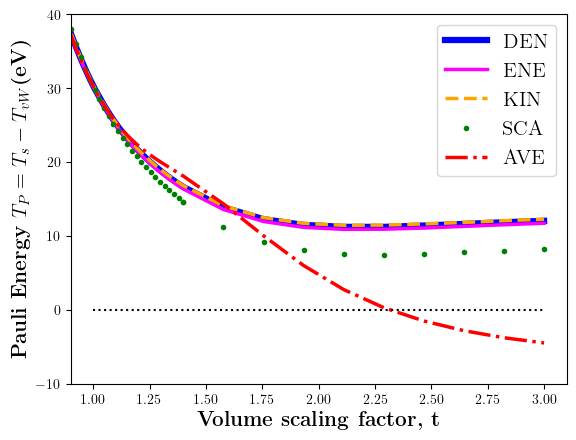

In [48]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')

plt.plot(r3, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
plt.plot(r3, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r3, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
plt.plot(r3, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'.', color='green', linewidth=2.5, label='SCA' )
plt.plot(r3, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )

plt.xlabel(r'\textbf{Volume scaling factor, t}',  fontsize=15)
plt.ylabel(r'\textbf{Pauli Energy \textbf{$T_{P}=T_{s} - T_{vW}$(eV)}',  fontsize=15)
plt.hlines(y=0,xmin=1,xmax=3,ls='dotted',colors='k')
plt.legend(fontsize="15")
plt.xlim(0.9,3.1)
plt.ylim(-10,40)
plt.savefig(path_file+'/EOS/WT_vW2.png', bbox_inches='tight', dpi=200)

In [ ]:
r2 = np.linspace(0.8,1.4, 30)
plt.plot(r2, np.asarray(rho0_den[0]).ravel(), 'b', linewidth=4.5, label='DEN' )
plt.plot(r2, np.asarray(rho0_ene[0]).ravel(), color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r2, np.asarray(rho0_kin[0]).ravel(),'--', color='orange', linewidth=2.5, label='KIN' )

In [102]:
rho0_mean

[array([0.05784741])]

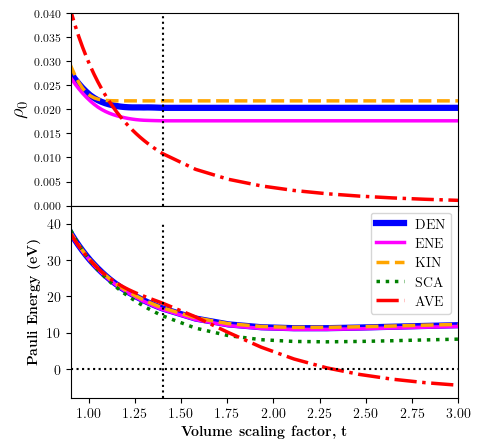

In [112]:
fig, axs = plt.subplots(2,1, figsize=(5,5),sharex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
axs[0].plot(r3, rho0_ene3, 'b', linewidth=4.5, label='DEN' )
axs[0].plot(r3, rho0_kin3, color='magenta', linewidth=2.5, label='ENE' )
axs[0].plot(r3, rho0_den3,'--', color='orange', linewidth=2.5, label='KIN' )
axs[0].plot(r3, np.asarray(rho0_mean[0]),'-.', color='red', linewidth=2.5, label='AVE' )
axs[0].set_xlim(0.9,3)
axs[0].set_ylim(0,0.04)
axs[0].vlines(x=1.4, ymin=0, ymax=0.5, ls='dotted', colors='k')
axs[0].tick_params(axis='both', labelsize=8)
# axs[0].legend()
axs[0].set_ylabel(r'\textbf{$\rho_0$}', fontsize=15)
axs[1].plot(r3, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
axs[1].plot(r3, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
axs[1].plot(r3, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
axs[1].plot(r3, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, linestyle='dotted', color='green', linewidth=2.5, label='SCA' )
axs[1].plot(r3, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r'\textbf{Volume scaling factor, t}')
axs[1].set_ylabel(r'\textbf{Pauli Energy (eV)}')
axs[1].hlines(y=0,xmin=0.9,xmax=3,ls='dotted',colors='k')
axs[1].vlines(x=1.4, ymin=-8, ymax=40, ls='dotted', colors='k')
axs[1].set_xlim(0.9,3)
axs[1].set_ylim(-8,45)
axs[1].legend()
plt.savefig(path_file+'/EOS/rho0_WT_vW3.png', bbox_inches='tight', dpi=200)


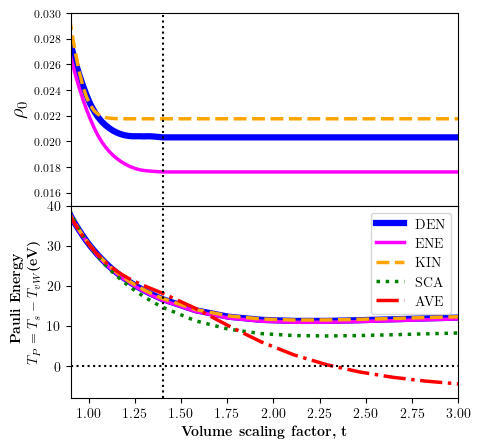

In [80]:
fig, axs = plt.subplots(2,1, figsize=(5,5),sharex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
axs[0].plot(r3, rho0_ene3, 'b', linewidth=4.5, label='DEN' )
axs[0].plot(r3, rho0_kin3, color='magenta', linewidth=2.5, label='ENE' )
axs[0].plot(r3, rho0_den3,'--', color='orange', linewidth=2.5, label='KIN' )
axs[0].set_xlim(0.9,3)
axs[0].set_ylim(0.015,0.03)
axs[0].vlines(x=1.4, ymin=0, ymax=0.5, ls='dotted', colors='k')
axs[0].tick_params(axis='both', labelsize=8)
# axs[0].legend()
axs[0].set_ylabel(r'\textbf{$\rho_0$}', fontsize=15)
axs[1].plot(r3, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
axs[1].plot(r3, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
axs[1].plot(r3, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
axs[1].plot(r3, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, linestyle='dotted', color='green', linewidth=2.5, label='SCA' )
axs[1].plot(r3, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r'\textbf{Volume scaling factor, t}')
axs[1].set_ylabel(r'\textbf{Pauli Energy \\ \textbf{$T_{P}=T_{s} - T_{vW}$(eV)}')
axs[1].hlines(y=0,xmin=0.9,xmax=3,ls='dotted',colors='k')
axs[1].vlines(x=1.4, ymin=-8, ymax=40, ls='dotted', colors='k')
axs[1].set_xlim(0.9,3)
axs[1].set_ylim(-8,40)
axs[1].legend()
plt.savefig(path_file+'/EOS/rho0_WT_vW3.png', bbox_inches='tight', dpi=200)


In [ ]:
fig, axs = plt.subplots(2,1, figsize=(5,5),sharex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
axs[0].plot(r2, np.asarray(rho0_den[0]).ravel(), 'b', linewidth=4.5, label='DEN' )
axs[0].plot(r2, np.asarray(rho0_ene[0]).ravel(), color='magenta', linewidth=2.5, label='ENE' )
axs[0].plot(r2, np.asarray(rho0_kin[0]).ravel(),'--', color='orange', linewidth=2.5, label='KIN' )
axs[0].set_xlim(0.9,3)
axs[0].set_ylabel(r'$\rho_0$')
axs[1].plot(r, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
axs[1].plot(r, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
axs[1].plot(r, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
axs[1].plot(r, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'.', color='green', linewidth=2.5, label='SCA' )
axs[1].plot(r, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r'\textbf{Volume scaling factor, t}')
axs[1].set_ylabel(r'\textbf{Pauli Energy \textbf{$T_{P}=T_{s} - T_{vW}$(eV)}')
axs[1].hlines(y=0,xmin=0.9,xmax=3,ls='dotted',colors='k')
axs[1].set_xlim(0.9,3)


In [ ]:
plt.scatter(r, (wt_e_ene['Si_8cd']), color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r, (wt_e_ene['Si_8cd']), color='magenta', linewidth=2.5, label='ENE' )
plt.ylim(10,11)

In [ ]:
wt_e_ene['Si_8cd'][11] += 0.01

In [ ]:
print(wt_e_ene['Si_8cd'][10])
print(wt_e_ene['Si_8cd'][11])
print(wt_e_ene['Si_8cd'][12])

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')

plt.plot(r, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
plt.plot(r, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
plt.plot(r, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'.', color='green', linewidth=2.5, label='SCA' )
plt.plot(r, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '--', color='red', linewidth=2.5, label='AVE' )

plt.xlabel(r'\textbf{Volume scaling factor, t}',  fontsize=15)
plt.ylabel(r'\textbf{Pauli Energy \textbf{$T_{P}=T_{s} - T_{vW}$ (eV)}',  fontsize=15)
plt.hlines(y=0,xmin=1,xmax=3,ls='dotted',colors='k')
plt.legend(fontsize="15")
plt.xlim(0.9,3.1)
plt.savefig(path_file+'/EOS/WT_vW2.png', bbox_inches='tight', dpi=200)

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')

plt.plot(r, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'r', linewidth=2.5, label='AVE' )
plt.plot(r, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
plt.plot(r, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
plt.plot(r, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'.', color='green', linewidth=2.5, label='SCA' )

plt.xlabel(r'\textbf{Stretching factor}',  fontsize=20)
plt.ylabel(r'\textbf{$T_{WT}-T_{vW} $(eV/atom)}',  fontsize=20)
plt.hlines(y=0,xmin=1,xmax=3,ls='dotted',colors='k')
plt.legend(fontsize="15")
plt.xlim(0.9,3.1)
plt.savefig(path_file+'/Results/EOS/WT_vW.png', bbox_inches='tight', dpi=200)

In [ ]:
TFvW = Functional(type='KEDF', name='TFvW')

In [ ]:
from dftpy.functional.kedf.kernel import WTKernel

In [ ]:
WTKernel()